# StrictJSON Ask Me Anything
- Edited 5 Aug to use custom llm as default

Overview
- A comprehensive guide as to how to use StrictJSON
- Produced live on 30 Apr 2024
- John Tan Chong Min
- Github repo: https://github.com/tanchongmin/strictjson
- Video: https://www.youtube.com/watch?v=L4aytve5v1Q

In [1]:
# !pip install strictjson

In [2]:
# yes, you just need these two
import os
from strictjson import *

In [3]:
os.environ['OPENAI_API_KEY'] = '<YOUR API KEY>'

In [4]:
# sample strict_json template
strict_json('You are a classifier',
            'It is a beautiful and sunny day',
            output_format = {'Classification': 'Positive or Negative'})

{'Classification': 'Positive'}

In [5]:
def llm(system_prompt: str, user_prompt: str) -> str:
    ''' Here, we use OpenAI for illustration, you can change it to your own LLM '''
    # ensure your LLM imports are all within this function
    from openai import OpenAI
    
    # define your own LLM here
    client = OpenAI()
    response = client.chat.completions.create(
        model='gpt-4o-mini',
        temperature = 0,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ]
    )
    return response.choices[0].message.content

# Basic Stuff: Classification, Extraction, etc

In [6]:
strict_json('You are a poem extender',
            'It is a beautiful and sunny day',
            output_format = {'Poem with three more sentences Array': 'Write three more sentences to complete the poem, type: array'},
            llm = llm)

{'Poem with three more sentences Array': ['The flowers bloom in bright array,',
  'Children laugh and run and play,',
  'Nature sings in a joyful sway.']}

In [7]:
text = '''Base Functionalities (see Tutorial.ipynb)
Ensures LLM outputs into a dictionary based on a JSON format (HUGE: Nested lists and dictionaries now supported)
Supports int, float, str, dict, list, Dict[], List[], Enum[], bool type forcing with LLM-based error correction, as well as LLM-based error correction using type: ensure <restriction>, and (advanced) custom user checks using custom_checks
Easy construction of LLM-based functions using Function (Note: renamed from strict_function to keep in line with naming convention of capitalised class groups. strict_function still works for legacy support.)
Easy integration with OpenAI JSON Mode by setting openai_json_mode = True
Exposing of llm variable for strict_json and Function for easy use of self-defined LLMs'''

In [8]:
res = strict_json(system_prompt = '''Output the types that are supported by StrictJSON, including uppercase types
Example Output Type Array: ['int', 'float', 'Enum[]'] ''',
            user_prompt = text,
            output_format = {'Output Type Array': 'Output types, type: array'},
            llm = llm)

In [9]:
res

{'Output Type Array': ['int',
  'float',
  'str',
  'dict',
  'list',
  'Dict[]',
  'List[]',
  'Enum[]',
  'bool']}

In [10]:
# Alternate way to get array by doing splits
res = strict_json(system_prompt = '''Output the types that are supported by StrictJSON, including uppercase types
Example Output Types: 'int'; 'float'; 'Enum[]' ''',
            user_prompt = text,
            output_format = {'Output Types': 'Output types separated by ;'},
            llm = llm)

In [11]:
res['Output Types'].split('; ')

['int', 'float', 'str', 'dict', 'list', 'Dict[]', 'List[]', 'Enum[]', 'bool']

In [12]:
res = strict_json(system_prompt = '''Find out all the (obj1, relationship, obj2) triplets''',
            user_prompt = text,
            output_format = {'Triplet Array': 'Triplets of the form (obj1, relationship, obj2), type: array'},
            llm = llm)

In [13]:
triplet_list = res['Triplet Array']

In [14]:
res2 = strict_json(system_prompt = '''Given the triplet list, write some code to display this as a Knowledge Graph''',
            user_prompt = triplet_list,
            output_format = {'Code': 'Code in Python to display knowledge graph from triplet list'}, 
            llm = llm)

In [15]:
print(res2['Code'])

import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Triplet list
triplets = [
    ('Base Functionalities', 'ensures', 'LLM outputs into a dictionary based on a JSON format'),
    ('Base Functionalities', 'supports', 'int, float, str, dict, list, Dict[], List[], Enum[], bool type forcing with LLM-based error correction'),
    ('Base Functionalities', 'supports', 'LLM-based error correction using type: ensure restriction'),
    ('Base Functionalities', 'supports', 'custom user checks using custom_checks'),
    ('Base Functionalities', 'easy construction of', 'LLM-based functions using Function'),
    ('Function', 'renamed from', 'strict_function'),
    ('Function', 'keeps in line with', 'naming convention of capitalised class groups'),
    ('strict_function', 'still works for', 'legacy support'),
    ('Base Functionalities', 'easy integration with', 'OpenAI JSON Mode'),
    ('OpenAI JSON Mode', 'set by', 'openai_json_mode = True'),
    ('B

## How to do error correction for code

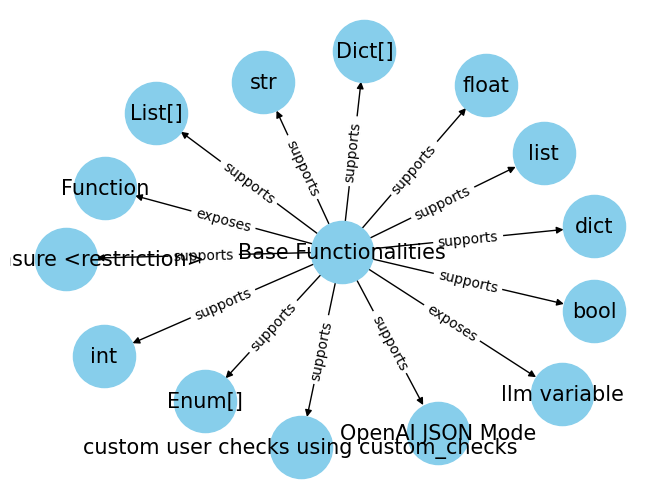

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

triplets = [('Base Functionalities', 'supports', 'int'), ('Base Functionalities', 'supports', 'float'), ('Base Functionalities', 'supports', 'str'), ('Base Functionalities', 'supports', 'dict'), ('Base Functionalities', 'supports', 'list'), ('Base Functionalities', 'supports', 'Dict[]'), ('Base Functionalities', 'supports', 'List[]'), ('Base Functionalities', 'supports', 'Enum[]'), ('Base Functionalities', 'supports', 'bool'), ('Base Functionalities', 'supports', 'type: ensure <restriction>'), ('Base Functionalities', 'supports', 'custom user checks using custom_checks'), ('Base Functionalities', 'supports', 'Function'), ('Base Functionalities', 'supports', 'OpenAI JSON Mode'), ('Base Functionalities', 'exposes', 'llm variable'), ('Base Functionalities', 'exposes', 'Function')]

g = nx.DiGraph()
for s, p, o in triplets:
    g.add_edge(s, o, label=p)
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(g, 'label')
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
plt.show()

In [17]:
code = '''import networkx as nx
import matplotlib.pyplot as plt

triplets = [('Base Functionalities', 'supports', 'int'), ('Base Functionalities', 'supports', 'float'), ('Base Functionalities', 'supports', 'str'), ('Base Functionalities', 'supports', 'dict'), ('Base Functionalities', 'supports', 'list'), ('Base Functionalities', 'supports', 'Dict[]'), ('Base Functionalities', 'supports', 'List[]'), ('Base Functionalities', 'supports', 'Enum[]'), ('Base Functionalities', 'supports', 'bool'), ('Base Functionalities', 'supports', 'type: ensure <restriction>'), ('Base Functionalities', 'supports', 'custom user checks using custom_checks'), ('Base Functionalities', 'supports', 'Function'), ('Base Functionalities', 'supports', 'OpenAI JSON Mode'), ('Base Functionalities', 'exposes', 'llm variable'), ('Base Functionalities', 'exposes', 'Function')]

g = nx.DiGraph()
for s, p, o in triplets:
    g.add_edge(s, o, label=p)
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(g, 'label')
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
plt.show()'''

error = '''---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[77], line 10
      8     g.add_edge(s, o, label=p)
      9 pos = nx.spring_layout(g)
---> 10 nx.draw(g, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15)
     11 edge_labels = nx.get_edge_attributes(g, 'label')
     12 nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

File ~/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:113, in draw(G, pos, ax, **kwds)
    111 cf.set_facecolor("w")
    112 if ax is None:
--> 113     if cf._axstack() is None:
    114         ax = cf.add_axes((0, 0, 1, 1))
    115     else:

TypeError: '_AxesStack' object is not callable'''

In [18]:
# use strictjson to do error correction
res3 = strict_json(system_prompt = f'''Given the Code and Error, correct the Code
Code: ```{code}```
Error: ```{error}```''',
            user_prompt = '',
            output_format = {'Code': 'Repeat Code',
                             'Error': 'Repeat Error',
                             'Thoughts': 'How to correct code',
                             'Corrected Code': 'Code in Python to display knowledge graph from triplet list'},
            llm = llm)

In [19]:
print(res3)

{'Code': "import networkx as nx\nimport matplotlib.pyplot as plt\n\ntriplets = [('Base Functionalities', 'supports', 'int'), ('Base Functionalities', 'supports', 'float'), ('Base Functionalities', 'supports', 'str'), ('Base Functionalities', 'supports', 'dict'), ('Base Functionalities', 'supports', 'list'), ('Base Functionalities', 'supports', 'Dict[]'), ('Base Functionalities', 'supports', 'List[]'), ('Base Functionalities', 'supports', 'Enum[]'), ('Base Functionalities', 'supports', 'bool'), ('Base Functionalities', 'supports', 'type: ensure <restriction>'), ('Base Functionalities', 'supports', 'custom user checks using custom_checks'), ('Base Functionalities', 'supports', 'Function'), ('Base Functionalities', 'supports', 'OpenAI JSON Mode'), ('Base Functionalities', 'exposes', 'llm variable'), ('Base Functionalities', 'exposes', 'Function')]\n\ng = nx.DiGraph()\nfor s, p, o in triplets:\n    g.add_edge(s, o, label=p)\npos = nx.spring_layout(g)\nnx.draw(g, pos, with_labels=True, node

In [20]:
print(res3['Corrected Code'])

import networkx as nx
import matplotlib.pyplot as plt

triplets = [('Base Functionalities', 'supports', 'int'), ('Base Functionalities', 'supports', 'float'), ('Base Functionalities', 'supports', 'str'), ('Base Functionalities', 'supports', 'dict'), ('Base Functionalities', 'supports', 'list'), ('Base Functionalities', 'supports', 'Dict[]'), ('Base Functionalities', 'supports', 'List[]'), ('Base Functionalities', 'supports', 'Enum[]'), ('Base Functionalities', 'supports', 'bool'), ('Base Functionalities', 'supports', 'type: ensure <restriction>'), ('Base Functionalities', 'supports', 'custom user checks using custom_checks'), ('Base Functionalities', 'supports', 'Function'), ('Base Functionalities', 'supports', 'OpenAI JSON Mode'), ('Base Functionalities', 'exposes', 'llm variable'), ('Base Functionalities', 'exposes', 'Function')]

g = nx.DiGraph()
for s, p, o in triplets:
    g.add_edge(s, o, label=p)
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_color='skyblue', n

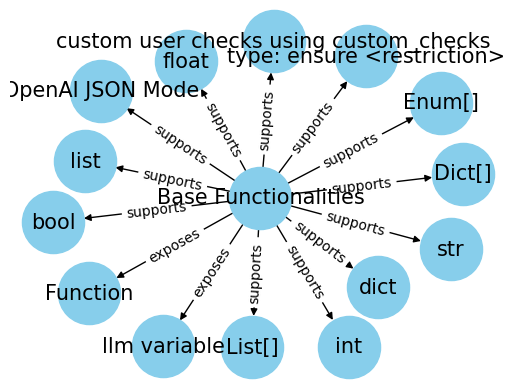

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

triplets = [('Base Functionalities', 'supports', 'int'), ('Base Functionalities', 'supports', 'float'), ('Base Functionalities', 'supports', 'str'), ('Base Functionalities', 'supports', 'dict'), ('Base Functionalities', 'supports', 'list'), ('Base Functionalities', 'supports', 'Dict[]'), ('Base Functionalities', 'supports', 'List[]'), ('Base Functionalities', 'supports', 'Enum[]'), ('Base Functionalities', 'supports', 'bool'), ('Base Functionalities', 'supports', 'type: ensure <restriction>'), ('Base Functionalities', 'supports', 'custom user checks using custom_checks'), ('Base Functionalities', 'supports', 'Function'), ('Base Functionalities', 'supports', 'OpenAI JSON Mode'), ('Base Functionalities', 'exposes', 'llm variable'), ('Base Functionalities', 'exposes', 'Function')]

g = nx.DiGraph()
for s, p, o in triplets:
    g.add_edge(s, o, label=p)
pos = nx.spring_layout(g)
fig, ax = plt.subplots()
nx.draw(g, pos, ax=ax, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(g, 'label')
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, ax=ax)
plt.show()

In [22]:
code = '''import networkx as nx
import matplotlib.pyplot as plt

triplets = [('Base Functionalities', 'supports', 'int'), ('Base Functionalities', 'supports', 'float'), ('Base Functionalities', 'supports', 'str'), ('Base Functionalities', 'supports', 'dict'), ('Base Functionalities', 'supports', 'list'), ('Base Functionalities', 'supports', 'Dict[]'), ('Base Functionalities', 'supports', 'List[]'), ('Base Functionalities', 'supports', 'Enum[]'), ('Base Functionalities', 'supports', 'bool'), ('Base Functionalities', 'supports', 'type: ensure <restriction>'), ('Base Functionalities', 'supports', 'custom user checks using custom_checks'), ('Base Functionalities', 'supports', 'Function'), ('Base Functionalities', 'supports', 'OpenAI JSON Mode'), ('Base Functionalities', 'exposes', 'llm variable'), ('Base Functionalities', 'exposes', 'Function')]

g = nx.DiGraph()
for s, p, o in triplets:
    g.add_edge(s, o, label=p)
pos = nx.spring_layout(g)
fig, ax = plt.subplots()
nx.draw(g, pos, ax=ax, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(g, 'label')
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, ax=ax)
plt.show()'''

In [23]:
# use strictjson to do error correction
res3 = strict_json(system_prompt = f'''Given the Code, change it to fit user query
Code: ```{code}```''',
            user_prompt = 'Change node size to be smaller',
            output_format = {'Corrected Code': 'Code in Python to fulfil user query'},
            llm = llm)

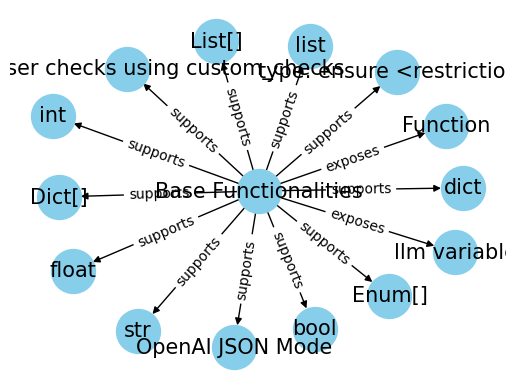

In [24]:
exec(res3['Corrected Code'])

# Multiple Output Types

In [25]:
res = strict_json('You are an arbitrary output mapper that takes in user text and outputs it to the respective output fields',
            'It is a bright and sunny day',
            output_format = {'Adjectives Array': 'Array of adjectives, type: array',
                            'Number of Adjectives': 'type: int',
                            'Sentiment': 'Positive or Negative',
                            'Sentiment2': 'type: Enum["P", "N", "O"]',
                            'Negative Sentiment': 'Is it negative, type: Enum[True, False]',
                            'Repeat the sentence': 'sentence ,type: str',
                            'Adjectives and their meaning Array': 'type: Array[Dict["Adjective", "Meaning"]]'},
            llm = llm)

In [26]:
res['Adjectives and their meaning Array'][0]['Adjective']

'bright'

In [27]:
res['Adjectives and their meaning Array'][0]['Meaning']

'giving out or reflecting a lot of light; vivid and cheerful'

# Chain of Thought
- Problem -> Solution (typical)
- Problem -> Substep 1 -> Substep 2 -> Solution (Chain of Thought)

In [28]:
strict_json('Solve the Math problem',
         'Mary has 5 apples. John has 2 apples. Mary gave John 1 apple. How many apples do they have in total?',
            output_format = {'Thoughts': 'Think step by step',
                        'Output': 'Number'},
           llm = llm)

{'Thoughts': "Initially, Mary has 5 apples and John has 2 apples. After Mary gives 1 apple to John, Mary will have 5 - 1 = 4 apples and John will have 2 + 1 = 3 apples. Now, to find the total number of apples, we add Mary's and John's apples together: 4 + 3 = 7 apples in total.",
 'Output': 7}

In [29]:
strict_json('Plan a 3-day trip to a country',
            'Italy',
            output_format = {'Trip Plan': 'Plan'},
           llm = llm)

{'Trip Plan': "Day 1: Arrive in Rome, visit the Colosseum and Roman Forum in the morning, have lunch at a local trattoria, explore the Vatican City in the afternoon including St. Peter's Basilica and the Sistine Chapel, dinner in Trastevere. Day 2: Take a train to Florence, visit the Uffizi Gallery and see Michelangelo's David, enjoy lunch at a café overlooking the Ponte Vecchio, spend the afternoon exploring the Duomo and its dome, dinner at a traditional Tuscan restaurant. Day 3: Day trip to Venice, take a gondola ride through the canals, visit St. Mark's Basilica and the Doge's Palace, have lunch at a seafood restaurant, explore the Rialto Market, return to Rome in the evening for departure."}

In [30]:
strict_json('Plan a 3-day trip to a country',
            'Italy',
            output_format = {'Broad Trip Plan': 'Broad Overall Plan for each day in the format <Day> - <Plan>, separated by comma',
                            'Specific Trip Plan': 'Plan for each day sticking to Overall Plan, including morning, afternoon, evening',
                            'Transport Arrangements': 'Transport arrangements for each day',
                            'Accomodation Arrangements': 'Accomodation arrangements for each day'},
           llm = llm)

{'Broad Trip Plan': 'Day 1 - Explore Rome, Day 2 - Visit Florence, Day 3 - Discover Venice',
 'Specific Trip Plan': "Day 1: Morning - Visit the Colosseum, Afternoon - Explore the Roman Forum, Evening - Dinner at a local trattoria. Day 2: Morning - Take a train to Florence, visit the Uffizi Gallery, Afternoon - Explore the Florence Cathedral, Evening - Enjoy a sunset view from Piazzale Michelangelo. Day 3: Morning - Take a train to Venice, visit St. Mark's Basilica, Afternoon - Explore the Doge's Palace, Evening - Gondola ride through the canals.",
 'Transport Arrangements': 'Day 1: Metro and walking in Rome, Day 2: Train from Rome to Florence, Day 3: Train from Florence to Venice',
 'Accomodation Arrangements': 'Day 1: Hotel in Rome, Day 2: Hotel in Florence, Day 3: Hotel in Venice'}

# Paragraph Summary

In [31]:
paragraph = ['' for _ in range(2)]

In [32]:
paragraph[0] = '''The Inaccessible Island rail (Laterallus rogersi) is a bird found only on Inaccessible Island in the South Atlantic Tristan archipelago. This rail, the smallest extant flightless bird, was described by physician Percy Lowe in 1923. The adult has brown plumage, a black bill, black feet, and red eyes. It occupies most habitats on the island, from the beaches to the central plateau, feeding on a variety of small invertebrates and some plant matter. Pairs are territorial and monogamous; both parents incubate the eggs and raise the chicks. The rail's adaptations to living on a tiny island at high densities include a low basal metabolic rate, small clutch sizes, and flightlessness. Unlike many other oceanic islands, Inaccessible Island has remained free from introduced predators, allowing this species to flourish while many other flightless rails have gone extinct. The species is nevertheless considered vulnerable, due to the danger of a single catastrophe wiping out the small, isolated population. '''

In [33]:
paragraph[1] = '''Acting prime minister of Haiti Ariel Henry (pictured) resigns, and is replaced by Michel Patrick Boisvert while the Transitional Presidential Council is sworn in.
The Ownership, Unity and Responsibility Party, led by Prime Minister Manasseh Sogavare, wins the most seats in the Solomon Islands general election but falls short of a majority.
NASA announces that the Voyager 1 space probe is sending readable data for the first time in five months.
The HDZ-led coalition wins the most seats in the Croatian parliamentary election but falls short of a majority.
Ich­thy­o­titan, the largest known marine reptile, is formally described.'''

In [34]:
for para in paragraph:
    res = strict_json('Take the paragraph and summarise it in the following json format',
        para,
        output_format = {'Bullet Point Array': 'Summarise each sentence as a bullet point of 10 words maximum each, type: array'},
        llm = llm)
    print(res)

{'Bullet Point Array': ['Inaccessible Island rail is found only on Inaccessible Island.', 'It is the smallest extant flightless bird known today.', 'Described by physician Percy Lowe in 1923.', 'Adult has brown plumage, black bill, and red eyes.', 'Occupies various habitats, feeding on invertebrates and plants.', 'Pairs are territorial, monogamous, and raise their chicks together.', 'Adaptations include low metabolic rate and small clutch sizes.', 'Island remains free from introduced predators, aiding survival.', 'Species is considered vulnerable due to potential catastrophes.']}
{'Bullet Point Array': ['Ariel Henry resigns as acting prime minister of Haiti.', 'Michel Patrick Boisvert replaces him after Transitional Council swearing in.', 'Ownership, Unity and Responsibility Party wins most seats in Solomon Islands.', 'Party led by Manasseh Sogavare fails to secure majority.', 'NASA receives readable data from Voyager 1 after five months.', 'HDZ-led coalition wins most seats in Croatia

In [35]:
print(paragraph)

["The Inaccessible Island rail (Laterallus rogersi) is a bird found only on Inaccessible Island in the South Atlantic Tristan archipelago. This rail, the smallest extant flightless bird, was described by physician Percy Lowe in 1923. The adult has brown plumage, a black bill, black feet, and red eyes. It occupies most habitats on the island, from the beaches to the central plateau, feeding on a variety of small invertebrates and some plant matter. Pairs are territorial and monogamous; both parents incubate the eggs and raise the chicks. The rail's adaptations to living on a tiny island at high densities include a low basal metabolic rate, small clutch sizes, and flightlessness. Unlike many other oceanic islands, Inaccessible Island has remained free from introduced predators, allowing this species to flourish while many other flightless rails have gone extinct. The species is nevertheless considered vulnerable, due to the danger of a single catastrophe wiping out the small, isolated po

# Reflection

In [36]:
strict_json('Create a four-sentence poem with 5 words that rhyme with cool. Each sentence should end with a .',
 '',
        output_format = {'5 words that rhyme with cool': 'words',
                        'Four sentence poem': 'Poem',
                        'Reflection': 'Count the number of sentences (ending with .) and reflect on whether it is four sentences',
                        'Updated poem with four sentences': 'Poem'},
        llm = llm)

{'5 words that rhyme with cool': 'school, pool, rule, tool, drool',
 'Four sentence poem': 'In the summer, we swim in the pool. The laughter echoes, breaking every rule. With friends around, we feel so cool, Sharing secrets like a precious tool.',
 'Reflection': 'The poem contains four sentences, each ending with a period.',
 'Updated poem with four sentences': 'In the summer, we swim in the pool. The laughter echoes, breaking every rule. With friends around, we feel so cool, Sharing secrets like a precious tool.'}

In [37]:
strict_json('Solve the Math problem',
         'Mary has 5 apples. John has 2 apples. Mary gave John 1 apple. How many apples do they have in total?',
            output_format = {'Output': 'Number',
                        'Reflection': 'Do an equation for Mary and John and evaluate the number of apples at the end',
                        'Corrected Output': 'Number'},
            llm = llm)

{'Output': 6,
 'Reflection': 'Mary initially has 5 apples and John has 2 apples. After Mary gives 1 apple to John, Mary has 4 apples and John has 3 apples. The total number of apples is 4 + 3 = 7.',
 'Corrected Output': 7}

# Evaluate with code for greater reliability

In [38]:
strict_json('Solve the Math problem',
         'Mary has 5223*2345 apples. John has 2 apples. Mary gave John 1112*342 apples. How many apples do they have in total?',
            output_format = {'Thoughts': 'Think step by step how to solve the problem',
                             'Output': 'Number'})

{'Thoughts': "First, calculate the number of apples Mary has by multiplying 5223 and 2345. Then, calculate the number of apples Mary gave to John by multiplying 1112 and 342. After that, subtract the number of apples given from Mary's total to find out how many apples she has left. Finally, add the remaining apples Mary has to the 2 apples John has to find the total number of apples they both have.",
 'Output': 12215407}

In [39]:
res = strict_json('Solve the Math problem by writing a program',
         'Mary has 5223*2345 apples. John has 2 apples. Mary gave John 1112*342 apples. How many apples do they have in total?',
            output_format = {'Thoughts': 'Think step by step how to solve the problem',
                             'Reflection': 'Reflect on equation for each person after the transfer',
                             'Updated Thoughts': 'Think step by step how to solve the problem',
                             'Code': 'Python function named answer to solve the problem'},
            llm = llm)

In [40]:
res

{'Thoughts': "First, calculate the number of apples Mary has by multiplying 5223 and 2345. Then, calculate how many apples Mary gives to John by multiplying 1112 and 342. After that, subtract the number of apples given from Mary's total to find out how many apples she has left. Finally, add the remaining apples Mary has to the apples John has to find the total number of apples they both have.",
 'Reflection': 'After the transfer, Mary has her original apples minus the apples she gave to John, and John has the apples he originally had plus the apples he received from Mary. This reflects the change in their individual counts after the transaction.',
 'Updated Thoughts': 'To solve the problem, I will first compute the total apples Mary has, then compute the apples she gives to John, and finally calculate the total apples they both have after the transfer.',
 'Code': 'def answer():\n    mary_apples = 5223 * 2345\n    john_apples = 2\n    apples_given = 1112 * 342\n    mary_apples_after = m

In [41]:
res['Code']

'def answer():\n    mary_apples = 5223 * 2345\n    john_apples = 2\n    apples_given = 1112 * 342\n    mary_apples_after = mary_apples - apples_given\n    john_apples_after = john_apples + apples_given\n    total_apples = mary_apples_after + john_apples_after\n    return total_apples'

In [42]:
exec(res['Code'])

In [43]:
answer()

12247937

# Extract rule-based filters from text for greater reliability

In [44]:
strict_json('Extract out the filter fields according to user query. If filter does not exist, output -1 or NA',
            'Get me an ice-cream that costs below 50 dollars',
            output_format = {'Price lower than': 'type: int',
                             'Price greater than': 'type: int',
                             'Item': 'type: str'},
           llm = llm)

{'Price lower than': 50, 'Price greater than': -1, 'Item': 'ice-cream'}

# Multiple Chains
- Can execute conditional flows
- Can break down a complex problem into easier sub-problems

In [45]:
res = strict_json('Generate me the Name of Card and type of a Yugioh Playing Card',
            '',
            output_format = {'Name of Card': 'type: str', 'Type': 'type: Enum["Trap", "Magic", "Monster"]'},
            llm = llm)

In [46]:
res

{'Name of Card': 'Dragon of the Abyss', 'Type': 'Monster'}

In [47]:
res['Type'] = 'Monster'

In [48]:
if res['Type'] == 'Monster':
    res2 = strict_json('Given the name and type of a Yugioh Playing Card, generate me a description and the attack/defence of the card',
                   res,
                   output_format = {'50-word description': '50 words, type: str', 'Attack': 'type: int', 'Defence': 'type: int'},
                    llm = llm)
elif res['Type'] == 'Magic':
    res2 = strict_json('Given the name and type of a Yugioh Playing Card, generate me a 100-word description of the magic',
                   res,
                   output_format = {'100-word description': '100 words'},
                   llm = llm)

In [49]:
res2

{'50-word description': 'The Dragon of the Abyss is a fearsome creature that dwells in the darkest depths of the ocean. With scales as hard as steel and eyes that pierce through the murky waters, it strikes terror into the hearts of its foes. Its power is unmatched in battle.',
 'Attack': 2500,
 'Defence': 2000}